In [7]:
import pandas as pd
dataset = pd.read_csv("https://raw.githubusercontent.com/Jacopo21/Startups_multiples/main/companies_data.csv?token=GHSAT0AAAAAACVPHE7SVQUJ47WOXCBTTKYMZWPJZRQ")

In [8]:
dataset.head()

,Organization Name,Organization Name URL,Growth Category,IPO Status,Company Type,Website,Number of Employees,Acquisition Status,Last Funding Type,Last Funding Date,...,Last Equity Funding Amount (in USD),Last Equity Funding Type,Total Equity Funding Amount,Total Equity Funding Amount Currency,Total Equity Funding Amount (in USD),Total Funding Amount,Total Funding Amount Currency,Total Funding Amount (in USD),Top 5 Investors,Number of Investors
0,Groq,https://www.crunchbase.com/organization/groq,Growing,Private,For Profit,http://groq.com,101-250,Made Acquisitions,Series D,2024-08-05,...,640000000.0,Series D,1.002551e+09,USD,1.002551e+09,1.002551e+09,USD,1.002551e+09,"BlackRock, Alumni Ventures, Neuberger Berman, ...",36.0
1,Protect AI,https://www.crunchbase.com/organization/protec...,Growing,Private,For Profit,https://protectai.com,11-50,Made Acquisitions,Series B,2024-08-02,...,60000000.0,Series B,1.085000e+08,USD,1.085000e+08,1.085000e+08,USD,1.085000e+08,"StepStone Group, Evolution Equity Partners, Ac...",13.0
2,Flo Health,https://www.crunchbase.com/organization/owhealth,Growing,Private,For Profit,https://flo.health,251-500,NaN,Series C,2024-07-30,...,200576013.0,Series C,2.760760e+08,USD,2.760760e+08,2.760760e+08,USD,2.760760e+08,"Founders Fund, Flint Capital, Target Global, G...",12.0
3,DevRev,https://www.crunchbase.com/organization/devrev,Growing,Private,For Profit,https://devrev.ai,251-500,NaN,Series A,2024-08-09,...,100825173.0,Series A,1.508252e+08,USD,1.508252e+08,1.508252e+08,USD,1.508252e+08,"Param Hansa Values, Khosla Ventures, Alumni Ve...",13.0
4,FLYR,https://www.crunchbase.com/organization/flyr,Growing,Private,For Profit,http://flyrlabs.com,501-1000,Made Acquisitions,Series D,2024-08-08,...,225000000.0,Series D,4.118427e+08,USD,4.118427e+08,4.818427e+08,USD,4.818427e+08,"BlackRock, Founders Fund, WestCap, Abu Dhabi I...",42.0


In [9]:
columns_to_drop = [
    "Organization Name URL", "Website", "Description", "Actively Hiring", "Acquisition Status",
    "Investor Type", "Investment Stage", "Founded Date Precision", 
    "Last Funding Amount Currency",
    "Last Equity Funding Amount Currency",
    "Total Equity Funding Amount Currency",
    "Total Funding Amount Currency"
]
dataset.drop(columns=columns_to_drop, inplace=True)

In [10]:
dataset.dropna(subset=[
    "Number of Founders",
    "Founded Date",
    "Number of Employees",
    "Industries",
    "Headquarters Location",
    "Top 5 Investors",
    "Number of Investors",
    "Total Equity Funding Amount (in USD)",
    "Last Equity Funding Amount (in USD)"
], inplace=True)

In [11]:
dataset.isna().sum()

Organization Name                       0
Growth Category                         0
IPO Status                              0
Company Type                            0
Number of Employees                     0
Last Funding Type                       0
Last Funding Date                       0
Industries                              0
Headquarters Location                   0
CB Rank (Company)                       0
Founded Date                            0
Operating Status                        0
Number of Founders                      0
Number of Funding Rounds                0
Funding Status                          0
Last Funding Amount                     0
Last Funding Amount (in USD)            0
Last Equity Funding Amount              0
Last Equity Funding Amount (in USD)     0
Last Equity Funding Type                0
Total Equity Funding Amount             0
Total Equity Funding Amount (in USD)    0
Total Funding Amount                    0
Total Funding Amount (in USD)     

In [12]:
dataset.shape

(5177, 26)

<Axes: >

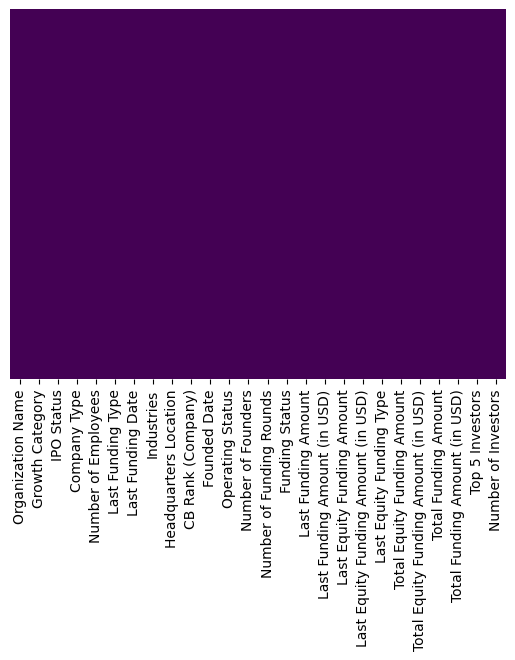

In [13]:
import seaborn as sns
sns.heatmap(dataset.isnull(), cmap='viridis', cbar=False, yticklabels=False)

In [14]:
dataset.columns

Index(['Organization Name', 'Growth Category', 'IPO Status', 'Company Type',
       'Number of Employees', 'Last Funding Type', 'Last Funding Date',
       'Industries', 'Headquarters Location', 'CB Rank (Company)',
       'Founded Date', 'Operating Status', 'Number of Founders',
       'Number of Funding Rounds', 'Funding Status', 'Last Funding Amount',
       'Last Funding Amount (in USD)', 'Last Equity Funding Amount',
       'Last Equity Funding Amount (in USD)', 'Last Equity Funding Type',
       'Total Equity Funding Amount', 'Total Equity Funding Amount (in USD)',
       'Total Funding Amount', 'Total Funding Amount (in USD)',
       'Top 5 Investors', 'Number of Investors'],
      dtype='object')

# Feature engineering

these are the features, when handles put in a "-" list:
       'Investor Type', 'Founded Date',
       'Founded Date Precision', 'Operating Status', 'Actively Hiring',
       'Investment Stage', 'Number of Founders', 'Number of Funding Rounds',
       'Funding Status', 'Last Funding Amount', 'Last Funding Amount Currency',
       'Last Funding Amount (in USD)', 'Last Equity Funding Amount',
       'Last Equity Funding Amount Currency',
       'Last Equity Funding Amount (in USD)', 'Last Equity Funding Type',
       'Total Equity Funding Amount', 'Total Equity Funding Amount Currency',
       'Total Equity Funding Amount (in USD)', 'Total Funding Amount',
       'Total Funding Amount Currency', 'Total Funding Amount (in USD)',
       'Top 5 Investors', 'Number of Investors'

To be dropped: Organization Name, Description

Handeled: 
- Growth Category
- IPO Status
- Company Type
- Number of Employees
- Acquisition Status
- Last Funding Type
- Last Funding Date
- Industries
- Headquarters Location
- CB Ranking (Company)

In [15]:
dataset["IPO Status"].unique()
dataset["Growth Category"].unique()

ipo_dummies = pd.get_dummies(dataset["IPO Status"], prefix="Status_")
dataset = pd.concat([dataset, ipo_dummies], axis=1)

growth_dummies = pd.get_dummies(dataset["Growth Category"], prefix="GrowthCategory_")
dataset = pd.concat([dataset, growth_dummies], axis=1)
dataset.head()


,Organization Name,Growth Category,IPO Status,Company Type,Number of Employees,Last Funding Type,Last Funding Date,Industries,Headquarters Location,CB Rank (Company),...,Total Equity Funding Amount,Total Equity Funding Amount (in USD),Total Funding Amount,Total Funding Amount (in USD),Top 5 Investors,Number of Investors,Status__Private,GrowthCategory__Growing,GrowthCategory__Not Growing,GrowthCategory__Stable
0,Groq,Growing,Private,For Profit,101-250,Series D,2024-08-05,"Artificial Intelligence (AI), Electronics, Mac...","Mountain View, California, United States",5,...,1.002551e+09,1.002551e+09,1.002551e+09,1.002551e+09,"BlackRock, Alumni Ventures, Neuberger Berman, ...",36.0,True,True,False,False
1,Protect AI,Growing,Private,For Profit,11-50,Series B,2024-08-02,"Artificial Intelligence (AI), Cyber Security, ...","Seattle, Washington, United States",19,...,1.085000e+08,1.085000e+08,1.085000e+08,1.085000e+08,"StepStone Group, Evolution Equity Partners, Ac...",13.0,True,True,False,False
2,Flo Health,Growing,Private,For Profit,251-500,Series C,2024-07-30,"Apps, Artificial Intelligence (AI), Health Car...","London, England, United Kingdom",24,...,2.760760e+08,2.760760e+08,2.760760e+08,2.760760e+08,"Founders Fund, Flint Capital, Target Global, G...",12.0,True,True,False,False
3,DevRev,Growing,Private,For Profit,251-500,Series A,2024-08-09,"Artificial Intelligence (AI), CRM, Customer Se...","Palo Alto, California, United States",28,...,1.508252e+08,1.508252e+08,1.508252e+08,1.508252e+08,"Param Hansa Values, Khosla Ventures, Alumni Ve...",13.0,True,True,False,False
4,FLYR,Growing,Private,For Profit,501-1000,Series D,2024-08-08,"Air Transportation, Analytics, Artificial Inte...","Santa Monica, California, United States",30,...,4.118427e+08,4.118427e+08,4.818427e+08,4.818427e+08,"BlackRock, Founders Fund, WestCap, Abu Dhabi I...",42.0,True,True,False,False


In [16]:
# Group variables starting with Status_ and GrowthCategory_ for being used later in randomforest
status_columns = [col for col in dataset.columns if col.startswith("Status_")]
growth_columns = [col for col in dataset.columns if col.startswith("GrowthCategory_")]
company = status_columns + growth_columns
status_columns, growth_columns


(['Status__Private'],
 ['GrowthCategory__Growing',
  'GrowthCategory__Not Growing',
  'GrowthCategory__Stable'])

In [17]:
dataset["Company Type"].unique()
dataset["Company Type"].info()

<class 'pandas.core.series.Series'>
Index: 5177 entries, 0 to 8140
Series name: Company Type
Non-Null Count  Dtype 
--------------  ----- 
5177 non-null   object
dtypes: object(1)
memory usage: 80.9+ KB


In [18]:
company_type_dummies = pd.get_dummies(dataset["Company Type"], prefix="CompanyType_")
dataset = pd.concat([dataset, company_type_dummies], axis=1)
dataset.head()

,Organization Name,Growth Category,IPO Status,Company Type,Number of Employees,Last Funding Type,Last Funding Date,Industries,Headquarters Location,CB Rank (Company),...,Total Equity Funding Amount (in USD),Total Funding Amount,Total Funding Amount (in USD),Top 5 Investors,Number of Investors,Status__Private,GrowthCategory__Growing,GrowthCategory__Not Growing,GrowthCategory__Stable,CompanyType__For Profit
0,Groq,Growing,Private,For Profit,101-250,Series D,2024-08-05,"Artificial Intelligence (AI), Electronics, Mac...","Mountain View, California, United States",5,...,1.002551e+09,1.002551e+09,1.002551e+09,"BlackRock, Alumni Ventures, Neuberger Berman, ...",36.0,True,True,False,False,True
1,Protect AI,Growing,Private,For Profit,11-50,Series B,2024-08-02,"Artificial Intelligence (AI), Cyber Security, ...","Seattle, Washington, United States",19,...,1.085000e+08,1.085000e+08,1.085000e+08,"StepStone Group, Evolution Equity Partners, Ac...",13.0,True,True,False,False,True
2,Flo Health,Growing,Private,For Profit,251-500,Series C,2024-07-30,"Apps, Artificial Intelligence (AI), Health Car...","London, England, United Kingdom",24,...,2.760760e+08,2.760760e+08,2.760760e+08,"Founders Fund, Flint Capital, Target Global, G...",12.0,True,True,False,False,True
3,DevRev,Growing,Private,For Profit,251-500,Series A,2024-08-09,"Artificial Intelligence (AI), CRM, Customer Se...","Palo Alto, California, United States",28,...,1.508252e+08,1.508252e+08,1.508252e+08,"Param Hansa Values, Khosla Ventures, Alumni Ve...",13.0,True,True,False,False,True
4,FLYR,Growing,Private,For Profit,501-1000,Series D,2024-08-08,"Air Transportation, Analytics, Artificial Inte...","Santa Monica, California, United States",30,...,4.118427e+08,4.818427e+08,4.818427e+08,"BlackRock, Founders Fund, WestCap, Abu Dhabi I...",42.0,True,True,False,False,True


,Organization Name,Growth Category,IPO Status,Company Type,Number of Employees,Last Funding Type,Last Funding Date,Industries,Headquarters Location,CB Rank (Company),...,CompanyType__For Profit,NumberEmployees__1-10,NumberEmployees__10001+,NumberEmployees__1001-5000,NumberEmployees__101-250,NumberEmployees__11-50,NumberEmployees__251-500,NumberEmployees__5001-10000,NumberEmployees__501-1000,NumberEmployees__51-100
0,Groq,Growing,Private,For Profit,101-250,Series D,2024-08-05,"Artificial Intelligence (AI), Electronics, Mac...","Mountain View, California, United States",5,...,True,False,False,False,True,False,False,False,False,False
1,Protect AI,Growing,Private,For Profit,11-50,Series B,2024-08-02,"Artificial Intelligence (AI), Cyber Security, ...","Seattle, Washington, United States",19,...,True,False,False,False,False,True,False,False,False,False
2,Flo Health,Growing,Private,For Profit,251-500,Series C,2024-07-30,"Apps, Artificial Intelligence (AI), Health Car...","London, England, United Kingdom",24,...,True,False,False,False,False,False,True,False,False,False
3,DevRev,Growing,Private,For Profit,251-500,Series A,2024-08-09,"Artificial Intelligence (AI), CRM, Customer Se...","Palo Alto, California, United States",28,...,True,False,False,False,False,False,True,False,False,False
4,FLYR,Growing,Private,For Profit,501-1000,Series D,2024-08-08,"Air Transportation, Analytics, Artificial Inte...","Santa Monica, California, United States",30,...,True,False,False,False,False,False,False,False,True,False


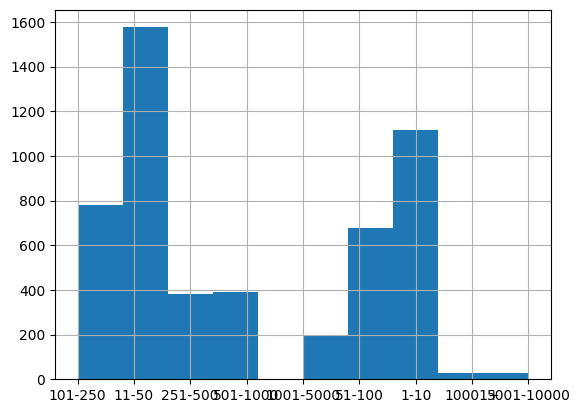

In [19]:
dataset["Number of Employees"].hist()
N_employees_dummies = pd.get_dummies(dataset["Number of Employees"], prefix="NumberEmployees_")
dataset = pd.concat([dataset, N_employees_dummies], axis=1)
dataset.head()

In [20]:
dataset['Last Funding Type'].unique(), dataset['Last Funding Date'].describe()
Funding_type_dummies = pd.get_dummies(dataset["Last Funding Type"], prefix="FundingType_")
dataset = pd.concat([dataset, Funding_type_dummies], axis=1)

dataset['Last Funding Date'] = pd.to_datetime(dataset['Last Funding Date'], format='%Y-%m-%d')

dataset.head()

,Organization Name,Growth Category,IPO Status,Company Type,Number of Employees,Last Funding Type,Last Funding Date,Industries,Headquarters Location,CB Rank (Company),...,FundingType__Seed,FundingType__Series A,FundingType__Series B,FundingType__Series C,FundingType__Series D,FundingType__Series E,FundingType__Series F,FundingType__Series G,FundingType__Series H,FundingType__Series I
0,Groq,Growing,Private,For Profit,101-250,Series D,2024-08-05,"Artificial Intelligence (AI), Electronics, Mac...","Mountain View, California, United States",5,...,False,False,False,False,True,False,False,False,False,False
1,Protect AI,Growing,Private,For Profit,11-50,Series B,2024-08-02,"Artificial Intelligence (AI), Cyber Security, ...","Seattle, Washington, United States",19,...,False,False,True,False,False,False,False,False,False,False
2,Flo Health,Growing,Private,For Profit,251-500,Series C,2024-07-30,"Apps, Artificial Intelligence (AI), Health Car...","London, England, United Kingdom",24,...,False,False,False,True,False,False,False,False,False,False
3,DevRev,Growing,Private,For Profit,251-500,Series A,2024-08-09,"Artificial Intelligence (AI), CRM, Customer Se...","Palo Alto, California, United States",28,...,False,True,False,False,False,False,False,False,False,False
4,FLYR,Growing,Private,For Profit,501-1000,Series D,2024-08-08,"Air Transportation, Analytics, Artificial Inte...","Santa Monica, California, United States",30,...,False,False,False,False,True,False,False,False,False,False


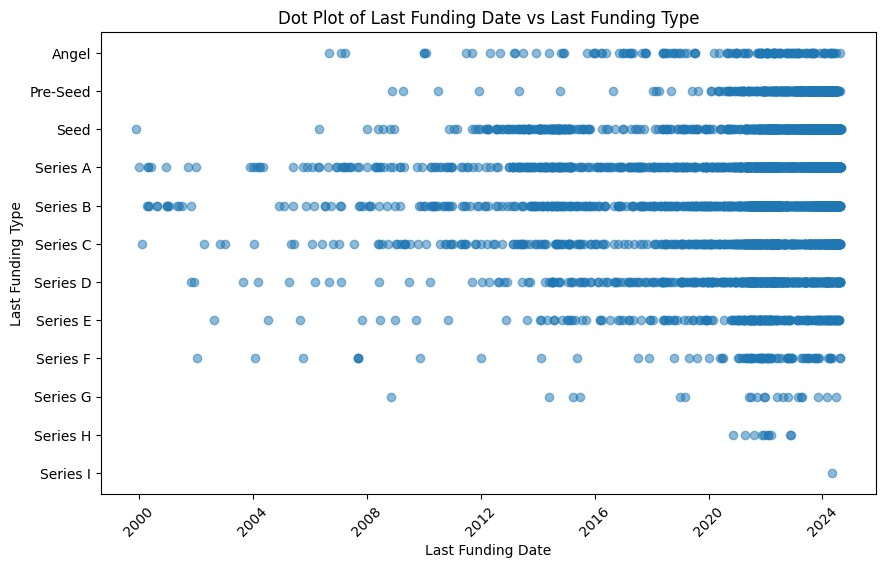

In [21]:
# create a plot of last funding type vs. last funding date
import matplotlib.pyplot as plt
dataset['Last Funding Date'] = pd.to_datetime(dataset['Last Funding Date'], format='%Y-%m-%d')
filtered_dataset = dataset[dataset['Last Funding Date'] >= '1995-01-01']
filtered_dataset = filtered_dataset.sort_values(by='Last Funding Type', ascending=False)

plt.figure(figsize=(10, 6))
plt.scatter(filtered_dataset['Last Funding Date'], filtered_dataset['Last Funding Type'], alpha=0.5)
plt.title('Dot Plot of Last Funding Date vs Last Funding Type')
plt.xlabel('Last Funding Date')
plt.ylabel('Last Funding Type')
plt.xticks(rotation=45)
plt.show()

In [22]:
dataset["Industries"].unique()
industry_dummies = dataset["Industries"].str.get_dummies(sep=',').add_prefix('Industry_')
dataset = pd.concat([dataset, industry_dummies], axis=1)

In [23]:
industries = dataset.columns[dataset.columns.str.startswith('Industry_')]

In [24]:
unique_headquarters = dataset["Headquarters Location"].unique()
unique_headquarters_df = pd.DataFrame(unique_headquarters, columns=["Headquarters Location"])
unique_headquarters_df

,Headquarters Location
0,"Mountain View, California, United States"
1,"Seattle, Washington, United States"
2,"London, England, United Kingdom"
3,"Palo Alto, California, United States"
4,"Santa Monica, California, United States"
...,...
982,"Ljubljana, Ljubljana Urban Commune, Slovenia"
983,"Baar, Zug, Switzerland"
984,"Hopkinton, Massachusetts, United States"
985,"Mason, Ohio, United States"


In [25]:
headquarters_dummies = dataset["Headquarters Location"].str.split(', ', expand=True)
headquarters_dummies.drop(columns=[3], inplace=True)
headquarters_dummies

,0,1,2
0,Mountain View,California,United States
1,Seattle,Washington,United States
2,London,England,United Kingdom
3,Palo Alto,California,United States
4,Santa Monica,California,United States
...,...,...,...
8136,San Francisco,California,United States
8137,Kitchener,Ontario,Canada
8138,Paris,Ile-de-France,France
8139,Acworth,Georgia,United States


In [26]:
# create dummies for headquarters location but consider two layers of dummies: 
# the first you should consider the country and the second the region, such that: if "Palo Alto, California, United States" 
# then create a dummy for country "country_United States" and a dummy for region "region_California"
headquarters_dummies.columns = ["City", "Region", "Country"]
headquarters_dummies = pd.get_dummies(headquarters_dummies, prefix=["City_", "Region_", "Country_"])
dataset = pd.concat([dataset, headquarters_dummies], axis=1)


In [27]:
location = [col for col in dataset.columns if col.startswith("City_") or col.startswith("Region_") or col.startswith("Country_")]
location

["City__'s-hertogenbosch",
 'City__Aachen',
 'City__Aarhus',
 'City__Abba Hillel',
 'City__Abeokuta',
 'City__Abingdon',
 'City__Accra',
 'City__Acworth',
 'City__Adelaide',
 'City__Agoura Hills',
 'City__Ahmedabad',
 'City__Akron',
 'City__Al Khobar',
 'City__Alameda',
 'City__Albany',
 'City__Albuquerque',
 'City__Alexandria',
 'City__Algiers',
 'City__Aliso Viejo',
 'City__Allston',
 'City__Alpharetta',
 'City__Alwar',
 'City__Amsterdam',
 'City__Andover',
 'City__Angleur',
 'City__Anjou',
 'City__Ankara',
 'City__Ann Arbor',
 'City__Annandale',
 'City__Antwerp',
 'City__Apex',
 'City__Arcadia',
 'City__Ardmore',
 'City__Argentina',
 'City__Arlington',
 'City__Arlington Heights',
 'City__Ashburn',
 'City__Ashland',
 'City__Athens',
 'City__Atlanta',
 'City__Auburn',
 'City__Auburndale',
 'City__Auckland',
 'City__Augsburg',
 'City__Aurora',
 'City__Austin',
 'City__Baar',
 'City__Bahia',
 'City__Bakersfield',
 'City__Bakirkoy',
 'City__Ballerup',
 'City__Baltimore',
 'City__Bandung'

In [28]:
dataset['CB Rank (Company)'] = dataset['CB Rank (Company)'].str.replace(',', '')
dataset['CB Rank (Company)'] = dataset['CB Rank (Company)'].astype(int)

In [29]:
min_value = dataset['CB Rank (Company)'].min().round(1)
max_value = dataset['CB Rank (Company)'].max().round(1)
mean_value = dataset['CB Rank (Company)'].mean().round(1)
median_value = dataset['CB Rank (Company)'].median().round(1)

# Create a DataFrame to store the statistics
stats_df = pd.DataFrame({
    'Statistic': ['Min', 'Max', 'Mean', 'Median'],
    'Value': [min_value, max_value, mean_value, median_value]
})
stats_df

,Statistic,Value
0,Min,5.0
1,Max,3463417.0
2,Mean,44627.7
3,Median,16396.0


- Extremely High: This category should include the top 0.1% of values., Threshold: Rank values between 5.0 and approximately 100.
- High: This category should include the next 1% of values. Threshold: Rank values between 101 and approximately 1,000.
- Medium-High: This category includes the next 10% of values. Threshold: Rank values between 1,001 and approximately 10,000.
- Medium: This is the middle category and could include the next 30% of values. Threshold: Rank values between 10,001 and approximately 50,000.
- Medium-Low: This category includes the next 30% of values. Threshold: Rank values between 50,001 and approximately 300,000.
- Low: This category includes the next 20% of values. Threshold: Rank values between 300,001 and approximately 1,000,000.
- Extremely Low: This category includes the bottom 8.9% of values. Threshold: Rank values between 1,000,001 and 3,463,417.

In [30]:
cb_rank = dataset['CB Rank (Company)']

def classify_cb_rank(rank):
    if rank <= 100:
        return 'Extremely High'
    elif rank <= 1000:
        return 'High'
    elif rank <= 10000:
        return 'Medium-High'
    elif rank <= 50000:
        return 'Medium'
    elif rank <= 300000:
        return 'Medium-Low'
    elif rank <= 1000000:
        return 'Low'
    else:
        return 'Extremely Low'

dataset['CB Rank Class'] = cb_rank.apply(classify_cb_rank)

cb_rank_dummies = pd.get_dummies(dataset['CB Rank Class'], prefix='CB Rank')

dataset = pd.concat([dataset, cb_rank_dummies], axis=1)

dataset.drop('CB Rank Class', axis=1, inplace=True)
dataset.head(3)

,Organization Name,Growth Category,IPO Status,Company Type,Number of Employees,Last Funding Type,Last Funding Date,Industries,Headquarters Location,CB Rank (Company),...,Country__United Kingdom,Country__United States,Country__Vietnam,CB Rank_Extremely High,CB Rank_Extremely Low,CB Rank_High,CB Rank_Low,CB Rank_Medium,CB Rank_Medium-High,CB Rank_Medium-Low
0,Groq,Growing,Private,For Profit,101-250,Series D,2024-08-05,"Artificial Intelligence (AI), Electronics, Mac...","Mountain View, California, United States",5,...,False,True,False,True,False,False,False,False,False,False
1,Protect AI,Growing,Private,For Profit,11-50,Series B,2024-08-02,"Artificial Intelligence (AI), Cyber Security, ...","Seattle, Washington, United States",19,...,False,True,False,True,False,False,False,False,False,False
2,Flo Health,Growing,Private,For Profit,251-500,Series C,2024-07-30,"Apps, Artificial Intelligence (AI), Health Car...","London, England, United Kingdom",24,...,True,False,False,True,False,False,False,False,False,False


In [31]:
ranking = [col for col in dataset.columns if col.startswith("CB Rank")]

# Dealing with financial variables
- Investment Stage,
- Number of Founders,
- Number of Funding Rounds,
- Funding Status, 
- Last Equity Funding Type
- Last Funding Amount, -> KEEP -> Last Funding Amount (in USD)'
- Last Funding Amount Currency,
- Last Equity Funding Amount',
- Last Equity Funding Amount Currency',
- Last Equity Funding Amount (in USD)', 'Last Equity Funding Type,
- Total Equity Funding Amount', 'Total Equity Funding Amount Currency,
- Total Equity Funding Amount (in USD)', 'Total Funding Amount,
- Total Funding Amount Currency', -> KEEP -> Total Funding Amount (in USD)

In [32]:
dataset["Funding Status"].unique()
funding_status_dummies = pd.get_dummies(dataset["Funding Status"], prefix="FundingStatus_")
dataset = pd.concat([dataset, funding_status_dummies], axis=1)


In [33]:
dataset["Last Equity Funding Type"].unique()
last_equity_funding_type_dummies = pd.get_dummies(dataset["Last Equity Funding Type"], prefix="LastEquityFundingType_")
dataset = pd.concat([dataset, last_equity_funding_type_dummies], axis=1)


In [34]:
founding = [
    "Number of Founders",
    "Number of Funding Rounds",
    *[col for col in dataset.columns if col.startswith("FundingStatus_")],
    *[col for col in dataset.columns if col.startswith("LastEquityFundingType_")],
    "Total Funding Amount (in USD)",
    "Total Equity Funding Amount (in USD)"
]

# Print the shape of the DataFrame columns
print(dataset[founding].shape)

(5177, 20)


In [35]:
dataset["Last Funding Amount (in USD)"].describe()

count    5.177000e+03
mean     4.237075e+07
std      1.356163e+08
min      3.020000e+02
25%      3.432313e+06
50%      1.300000e+07
75%      4.134908e+07
max      6.000000e+09
Name: Last Funding Amount (in USD), dtype: float64

In [36]:
dataset["Top 5 Investors"].unique()

array(['BlackRock, Alumni Ventures, Neuberger Berman, GCM Grosvenor, Global Brain Corporation',
       'StepStone Group, Evolution Equity Partners, Acrew Capital, Samsung Electronics, boldstart ventures',
       'Founders Fund, Flint Capital, Target Global, General Atlantic, Mangrove Capital Partners',
       ...,
       'Bpifrance, Aglaé Ventures, Eduardo Ronzano, Raise Ventures, Thomas Rebaud',
       'Meituan, ByteDance, CICC, Shunwei Capital, Lenovo Capital and Incubator Group (LCIG)',
       'Maximon'], dtype=object)

In [37]:
investors_dummies = pd.get_dummies(dataset["Top 5 Investors"].str.split(', ', expand=False).str.join('|').str.get_dummies())
investors_dummies = investors_dummies.add_prefix('Investor_')
investors_dummies

,Investor_ Group,Investor_ High-Tech Gruenderfonds,Investor_ Third Culture Capital,Investor_#Angels,Investor_(ERA) Entrepreneurs Roundtable Accelerator,Investor_+ BAs,Investor_+ND Capital,Investor_.406 Ventures,Investor_01booster,Investor_10 BOND,...,Investor_venVelo,Investor_w3.fund,Investor_xMillion Capital,Investor_xdeck,Investor_xto10x Technologies,Investor_Çalık Enerji,Investor_Établissement Peugeot Frères,Investor_Ørsted,Investor_Ørsted Propel acceleration programme,Investor_Łukasz Adziński
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8136,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8137,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8138,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8139,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
dataset = pd.concat([dataset, investors_dummies], axis=1)

In [39]:
investors = [col for col in dataset.columns if col.startswith("Investor_")]

In [40]:
dataset["y"] = dataset["Last Funding Amount (in USD)"]

In [41]:
print(dataset[company].shape)
print(dataset[location].shape)
print(dataset[industries].shape)
print(dataset[ranking].shape)
print(dataset[founding].shape)
print(dataset[investors].shape)

(5177, 4)
(5177, 1367)
(5177, 1009)
(5177, 8)
(5177, 20)
(5177, 8310)


## last part of feature engineeriing and creation of variables

In [42]:
company = dataset[company]
location = dataset[location]
industries = dataset[industries]
ranking = dataset[ranking]
founding = dataset[founding]
investors = dataset[investors]

y = dataset["y"]

In [43]:
dataset.columns

Index(['Organization Name', 'Growth Category', 'IPO Status', 'Company Type',
       'Number of Employees', 'Last Funding Type', 'Last Funding Date',
       'Industries', 'Headquarters Location', 'CB Rank (Company)',
       ...
       'Investor_w3.fund', 'Investor_xMillion Capital', 'Investor_xdeck',
       'Investor_xto10x Technologies', 'Investor_Çalık Enerji',
       'Investor_Établissement Peugeot Frères', 'Investor_Ørsted',
       'Investor_Ørsted Propel acceleration programme',
       'Investor_Łukasz Adziński', 'y'],
      dtype='object', length=10762)

In [44]:
predictors_1 = company + location + industries + ranking
predictors_2 = company + location + industries + ranking + founding
predictors_3 = company + location + industries + ranking + founding + investors

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from patsy import dmatrices
data_train, data_holdout = train_test_split(dataset, test_size=0.2, random_state=42)

rfr = RandomForestRegressor(
    random_state=42,
    criterion='mse',
    n_estimators=70,
    oob_score=True,
    n_jobs=-1
)

tune_grid = {
    "max_features": [10, 12],
    "min_sample_split": [2, 5]
}

rf_random = GridSearchCV(
    rfr,
    tune_grid,
    cv=5,
    scoring="neg_root_mean_squared_error",
    verbose=3
)
formula = "y ~ company + location + industries + ranking"
y, X = dmatrices(formula, data_train, return_type='dataframe')

rf_model_2 = rf_random.fit(X, y.values.ravel())

PatsyError: categorical data cannot be >1-dimensional

# Variable summary for Random Forest

In [ ]:
X = pd.concat([
    dataset[company],
    dataset[location],
    dataset[industries],
    dataset[ranking],
    dataset[founding],
    dataset[investors]
], axis=1)
y = dataset["y"]


In [ ]:
X.shape, y.shape

((5177, 10718), (5177,))

In [ ]:
from sklearn.model_selection import train_test_split
X.dtypes

Status__Private                                   bool
GrowthCategory__Growing                           bool
GrowthCategory__Not Growing                       bool
GrowthCategory__Stable                            bool
City__'s-hertogenbosch                            bool
                                                 ...  
Investor_Çalık Enerji                            int64
Investor_Établissement Peugeot Frères            int64
Investor_Ørsted                                  int64
Investor_Ørsted Propel acceleration programme    int64
Investor_Łukasz Adziński                         int64
Length: 10718, dtype: object

In [ ]:
X = X.dropna()
y = y[X.index]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(4141, 10718) (1036, 10718) (4141,) (1036,)


# let's just get an overview

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score



# More serious with Random Forest

In [45]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

In [46]:
param_grid = {
    'n_estimators': [50, 70],
    'max_depth': [20, 30],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rf = RandomForestRegressor(random_state=42, verbose=1)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=4)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  1.8min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  1.8min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  1.8min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  1.8min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s


[CV 4/5] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.710 total time= 1.9min
[CV 2/5] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.752 total time= 1.9min


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s


[CV 3/5] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=-0.816 total time= 1.9min


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s


[CV 1/5] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.716 total time= 1.9min


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  1.4min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s


[CV 5/5] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.364 total time= 1.5min


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  1.5min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  1.5min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  1.5min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s


[CV 2/5] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=70;, score=0.773 total time= 2.2min


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s


[CV 3/5] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=70;, score=-0.827 total time= 2.2min
[CV 1/5] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=70;, score=0.745 total time= 2.2min


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  1.5min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  1.2min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  1.3min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[CV 2/5] END max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=0.749 total time= 1.3min


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s


[CV 1/5] END max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=0.712 total time= 1.4min


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  1.4min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s


[CV 4/5] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=70;, score=0.747 total time= 2.1min


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s


[CV 5/5] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=70;, score=0.361 total time= 2.1min


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  1.2min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  1.2min


[CV 3/5] END max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=-0.928 total time= 1.3min


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s


[CV 4/5] END max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=0.727 total time= 1.3min


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  1.1min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s


[CV 5/5] END max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=0.368 total time= 1.2min


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  1.2min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  1.4min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s


[CV 1/5] END max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=70;, score=0.745 total time= 2.0min


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  1.4min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  1.4min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[CV 2/5] END max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=70;, score=0.769 total time= 2.0min


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[CV 3/5] END max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=70;, score=-1.151 total time= 2.0min


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s


[CV 4/5] END max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=70;, score=0.763 total time= 2.0min


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  1.3min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[CV 5/5] END max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=70;, score=0.363 total time= 1.8min


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  1.3min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  1.2min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[CV 1/5] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.804 total time= 1.3min


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s


[CV 2/5] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.805 total time= 1.3min


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  1.2min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[CV 3/5] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=-1.499 total time= 1.3min


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  1.3min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  1.3min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[CV 4/5] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.824 total time= 1.4min


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[CV 5/5] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.390 total time= 1.3min


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  1.4min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  1.3min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s


[CV 1/5] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=70;, score=0.798 total time= 1.8min


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s


[CV 2/5] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=70;, score=0.804 total time= 1.8min


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  1.1min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  1.0min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[CV 4/5] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=70;, score=0.829 total time= 1.5min


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[CV 3/5] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=70;, score=-1.512 total time= 1.6min


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  1.0min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  1.0min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[CV 1/5] END max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=0.796 total time= 1.1min


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s


[CV 5/5] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=70;, score=0.386 total time= 1.5min


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  1.0min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  1.0min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[CV 2/5] END max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=0.784 total time= 1.1min


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s


[CV 3/5] END max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=-1.456 total time= 1.1min


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  1.0min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[CV 4/5] END max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=0.822 total time= 1.1min


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:   57.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[CV 5/5] END max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=0.383 total time= 1.0min


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:   59.5s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:   57.9s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:   58.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:   57.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[CV 2/5] END max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=70;, score=0.775 total time= 1.4min


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[CV 1/5] END max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=70;, score=0.791 total time= 1.4min


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s


[CV 3/5] END max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=70;, score=-1.500 total time= 1.4min


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s


[CV 4/5] END max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=70;, score=0.824 total time= 1.4min


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:   55.8s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[CV 5/5] END max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=70;, score=0.375 total time= 1.3min


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  1.3min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[CV 1/5] END max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.712 total time= 1.4min


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  1.3min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s


[CV 2/5] END max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.738 total time= 1.4min


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  1.3min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s


[CV 3/5] END max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=-1.001 total time= 1.4min


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  1.4min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  1.3min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[CV 4/5] END max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.746 total time= 1.5min


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[CV 5/5] END max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.363 total time= 1.4min


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  1.4min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  1.4min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s


[CV 1/5] END max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=70;, score=0.743 total time= 2.1min


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s


[CV 2/5] END max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=70;, score=0.762 total time= 2.0min


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  1.4min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  1.4min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s


[CV 3/5] END max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=70;, score=-1.249 total time= 2.1min


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[CV 4/5] END max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=70;, score=0.772 total time= 2.1min


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  1.3min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  1.2min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[CV 1/5] END max_depth=30, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=0.713 total time= 1.2min


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s


[CV 5/5] END max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=70;, score=0.364 total time= 2.0min


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  1.2min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  1.2min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s


[CV 2/5] END max_depth=30, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=0.747 total time= 1.3min


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s


[CV 3/5] END max_depth=30, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=-0.938 total time= 1.3min


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  1.2min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[CV 4/5] END max_depth=30, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=0.741 total time= 1.3min


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  1.1min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[CV 5/5] END max_depth=30, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=0.368 total time= 1.2min


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  1.1min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  1.1min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  1.1min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[CV 2/5] END max_depth=30, min_samples_leaf=1, min_samples_split=5, n_estimators=70;, score=0.767 total time= 1.6min


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s


[CV 1/5] END max_depth=30, min_samples_leaf=1, min_samples_split=5, n_estimators=70;, score=0.744 total time= 1.7min


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  1.1min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[CV 3/5] END max_depth=30, min_samples_leaf=1, min_samples_split=5, n_estimators=70;, score=-1.059 total time= 1.6min


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[CV 4/5] END max_depth=30, min_samples_leaf=1, min_samples_split=5, n_estimators=70;, score=0.763 total time= 1.7min


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  1.1min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  1.1min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[CV 1/5] END max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.800 total time= 1.2min


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  1.1min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[CV 2/5] END max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.793 total time= 1.1min


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s


[CV 5/5] END max_depth=30, min_samples_leaf=1, min_samples_split=5, n_estimators=70;, score=0.361 total time= 1.6min


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  1.1min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s


[CV 3/5] END max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=-1.444 total time= 1.1min


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  1.1min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[CV 4/5] END max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.810 total time= 1.1min


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  1.0min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[CV 5/5] END max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.379 total time= 1.1min


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  1.1min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  1.0min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[CV 1/5] END max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=70;, score=0.795 total time= 1.6min


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s


[CV 2/5] END max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=70;, score=0.795 total time= 1.5min


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  1.1min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  1.0min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[CV 3/5] END max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=70;, score=-1.488 total time= 1.5min


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[CV 4/5] END max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=70;, score=0.816 total time= 1.5min


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  1.0min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  1.0min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[CV 1/5] END max_depth=30, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=0.798 total time= 1.1min


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[CV 5/5] END max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=70;, score=0.380 total time= 1.5min


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  1.0min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[CV 2/5] END max_depth=30, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=0.783 total time= 1.1min


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  1.0min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[CV 3/5] END max_depth=30, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=-1.495 total time= 1.1min


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  1.0min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[CV 4/5] END max_depth=30, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=0.825 total time= 1.1min


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:   57.6s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[CV 5/5] END max_depth=30, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=0.381 total time= 1.0min


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  1.0min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:   59.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[CV 1/5] END max_depth=30, min_samples_leaf=2, min_samples_split=5, n_estimators=70;, score=0.791 total time= 1.5min


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  1.0min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[CV 2/5] END max_depth=30, min_samples_leaf=2, min_samples_split=5, n_estimators=70;, score=0.773 total time= 1.5min


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  1.1min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[CV 3/5] END max_depth=30, min_samples_leaf=2, min_samples_split=5, n_estimators=70;, score=-1.525 total time= 1.5min


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[CV 4/5] END max_depth=30, min_samples_leaf=2, min_samples_split=5, n_estimators=70;, score=0.829 total time= 1.4min


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:   44.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[CV 5/5] END max_depth=30, min_samples_leaf=2, min_samples_split=5, n_estimators=70;, score=0.381 total time=  57.4s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:   47.2s


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42, verbose=1),
             n_jobs=-1,
             param_grid={'max_depth': [20, 30], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 70]},
             verbose=4)

In [47]:
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

Best parameters found:  {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 70}


In [49]:
best_rf = grid_search.best_estimator_

In [50]:

y_pred = best_rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error on test set: ", mse)

Mean Squared Error on test set:  2288220060066652.0


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s


In [ ]:
import numpy as np
importances = best_rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.title('Feature Importance')
plt.show()